# LAB | BMI Survey 


## Part 1: Descriptive Analysis

## Problem Description

Overweight and obesity, measured by Body Mass Index (BMI), are increasing health concerns in Denmark and globally. This project analyzes BMI data from a Danish survey to provide an overview of BMI distributions and investigate potential factors influencing BMI, such as gender, age, and fast food consumption. The analysis aims to summarize and visualize the data using descriptive statistics and graphical methods.

---

## Instructions

- Complete each section below using Python and appropriate libraries (e.g., pandas, numpy, matplotlib, seaborn).
- Provide code, tables, and figures as needed.
- Write brief explanations for your findings after each analysis step.
- Do **not** include code in your final report; code should be submitted separately as an appendix.
- Ensure all figures and tables are clearly labeled and referenced in your explanations.

---

## Q1. Data Overview

**a) Short Description of the Data**

- List all variables in the dataset.
- Classify each variable as quantitative or categorical.
- State the number of observations.
- Check for missing values.


**Instructions:**  
- Summarize the dataset variables and their types.
- Report the number of observations and any missing values.

---

In [12]:
## TODO
### Insert your Answer Here ###

import pandas as pd

data = pd.read_csv("C:/Users/fee10/OneDrive/Ironhack/Module2/labs/lab-eda-bmi/your-code/data/bmi1_data.csv",sep=';')

data.columns

data


,height,weight,gender,urbanity,fastfood
0,180,80,1,5,24.0
1,185,98,1,1,6.0
2,180,80,1,5,6.0
3,168,60,0,4,24.0
4,173,83,1,5,24.0
...,...,...,...,...,...
140,162,69,0,2,6.0
141,174,73,1,5,182.5
142,170,70,0,4,6.0
143,178,56,0,5,1.0


## 2. Calculating BMI

- Compute BMI for each respondent using the formula:

  $$\text{BMI} = \frac{\text{weight (kg)}}{\left[\text{height (m)}\right]^2}$$

- Add BMI as a new column to the dataset.

---


In [14]:
## TODO
### Insert your Answer Here ###

data['BMI'] = data['weight'] / (data['height'] ** 2)
data


,height,weight,gender,urbanity,fastfood,BMI
0,180,80,1,5,24.0,0.002469
1,185,98,1,1,6.0,0.002863
2,180,80,1,5,6.0,0.002469
3,168,60,0,4,24.0,0.002126
4,173,83,1,5,24.0,0.002773
...,...,...,...,...,...,...
140,162,69,0,2,6.0,0.002629
141,174,73,1,5,182.5,0.002411
142,170,70,0,4,6.0,0.002422
143,178,56,0,5,1.0,0.001767



## 3. Empirical Distribution of BMI

**b) Density Histogram of BMI Scores**

- Plot a density histogram of BMI.
- Describe the distribution: symmetry, skewness, possible negative values, and variation.

**Instructions:**  
- Comment on the shape and spread of the BMI distribution.

---


Text(0.5, 1.0, 'Density-Histogramm')

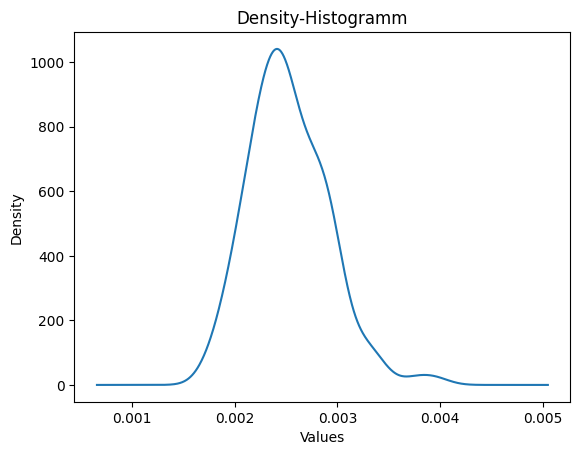

In [18]:
import matplotlib.pyplot as plt

data['BMI'].plot.kde()

# Achsenbeschriftung und Titel hinzufügen
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density-Histogramm')


## 4. Gender Subsets

**c) Separate Density Histograms for Women and Men**

- Create subsets for women and men.
- Plot density histograms for each group.
- Compare and describe the distributions.


**Instructions:**  
- Discuss any gender differences in the BMI distributions.

---


<Axes: ylabel='Density'>

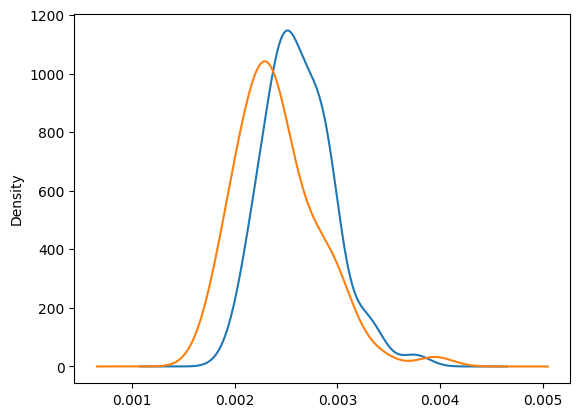

In [21]:
# Dichte-Histogramm für Frauen (female)
ax = data[data['gender'] == 1]['BMI'].plot.kde(label='Female')

# Dichte-Histogramm für Männer (male) auf dem gleichen Plot
data[data['gender'] == 0]['BMI'].plot.kde(label='Male', ax=ax)


## 5. Boxplot by Gender

**d) Box Plot of BMI by Gender**

- Create a box plot of BMI scores grouped by gender.
- Describe the distribution, symmetry/skewness, differences, and outliers.

**Instructions:**  
- Interpret the box plot and compare distributions.

---


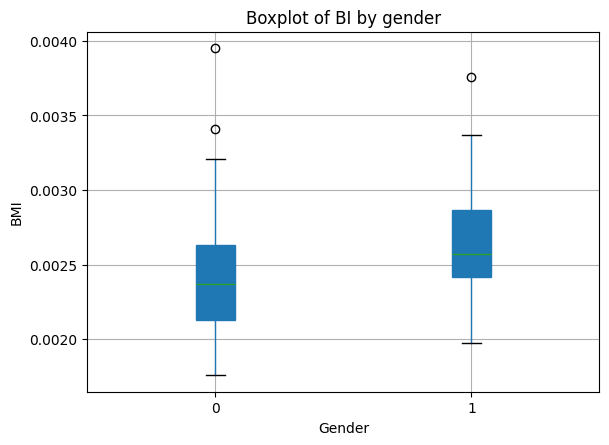

In [22]:
data.boxplot(column='BMI', by='gender', patch_artist=True)

plt.xlabel('Gender')
plt.ylabel('BMI')
plt.title('Boxplot of BI by gender')
plt.suptitle('')  

plt.show()

## 6. Summary Statistics

**e) Key Summary Statistics for BMI**

- Calculate and report the following for everyone, women, and men:
  - Number of observations (n)
  - Sample mean (\(\bar{x}\))
  - Sample variance (\(s^2\))
  - Sample standard deviation (\(s\))
  - Lower quartile (Q1)
  - Median (Q2)
  - Upper quartile (Q3)

**Instructions:**  
- Present the summary statistics in a table.
- Discuss what additional insights are provided by the table compared to the box plot.

---


In [23]:
data.describe()

,height,weight,gender,urbanity,fastfood,BMI
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,173.903448,76.737931,0.503448,3.668966,21.037241,0.002525
std,9.328365,15.208286,0.501721,1.374647,40.321484,0.000383
min,154.000000,50.000000,0.000000,1.000000,0.000000,0.001758
25%,166.000000,65.000000,0.000000,3.000000,6.000000,0.002259
50%,173.000000,75.000000,1.000000,4.000000,6.000000,0.002469
75%,182.000000,87.000000,1.000000,5.000000,24.000000,0.002764
max,196.000000,130.000000,1.000000,5.000000,365.000000,0.003952


## Part 2: Missing Values, Outliers, and Bivariate EDA

## 1. Missing Values

- List the number of missing values for each variable in the dataset.
- Choose and apply appropriate strategies for handling missing values (e.g., removal, imputation).
- Justify your chosen approach.
- Show the number of observations before and after handling missing values.

In [24]:
missing_values = data.isnull().sum()

print(missing_values)

height      0
weight      0
gender      0
urbanity    0
fastfood    0
BMI         0
dtype: int64


## 2. Outlier Detection and Handling

### a) Identifying Outliers

- Use visual (boxplots, scatterplots) and statistical methods (e.g., IQR rule, z-scores) to detect outliers in BMI, height, and weight.
- List any extreme values found and discuss whether they are plausible or likely errors.



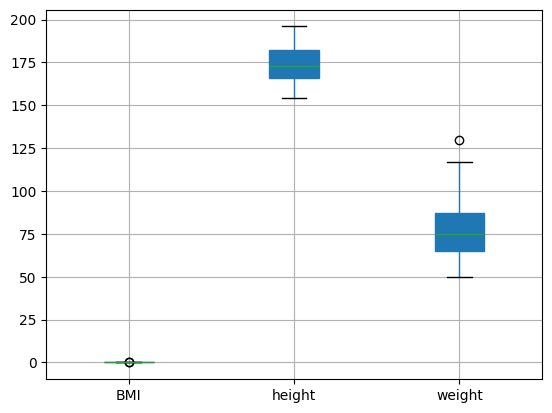

In [25]:
data.boxplot(column=['BMI', 'height', 'weight'], patch_artist=True)


plt.show()


### b) Handling Outliers

- Decide how to handle detected outliers (e.g., keep, remove, or correct).
- Justify your approach and show the effect on the dataset.



In [ ]:
## TODO
### keeop outliers as they are not far outside

## 3. Bivariate Exploratory Data Analysis (EDA)

### a) BMI and Fast Food Consumption

- Create a scatter plot of BMI vs. fast food consumption.
- Calculate and interpret the correlation coefficient.
- Comment on any patterns or associations observed.

<Axes: title={'center': 'Scatterplot: BMI vs Fast Food Consumption'}, xlabel='BMI', ylabel='fastfood'>

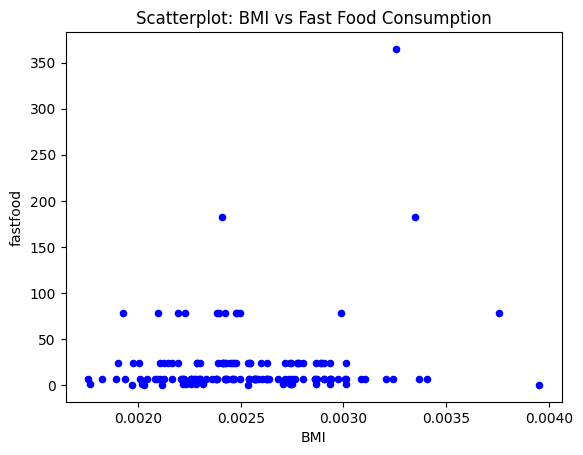

In [26]:

data.plot.scatter(x='BMI', y='fastfood', color='blue', title='Scatterplot: BMI vs Fast Food Consumption')

### b) BMI by Gender

- Use boxplots or violin plots to compare BMI distributions between genders.
- Test for significant differences (e.g., t-test or Mann-Whitney U test).

<Axes: title={'center': 'BMI'}, xlabel='gender'>

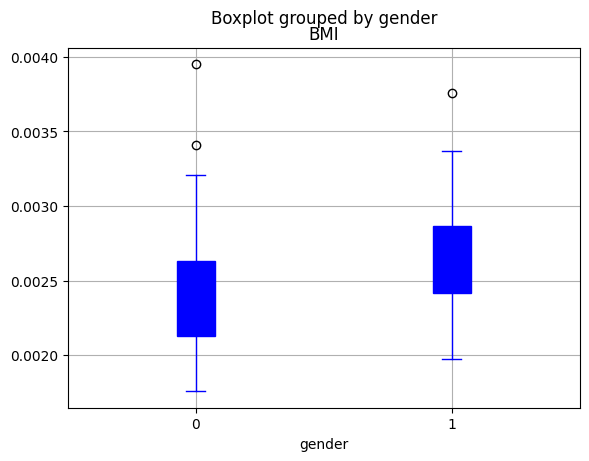

In [29]:
data.boxplot(column='BMI', by='gender', color='blue', patch_artist=True)

### c) BMI by Urbanity

- Visualize BMI across different urbanity categories using boxplots or bar plots.
- Discuss any differences or trends.

<Axes: title={'center': 'BMI'}, xlabel='urbanity'>

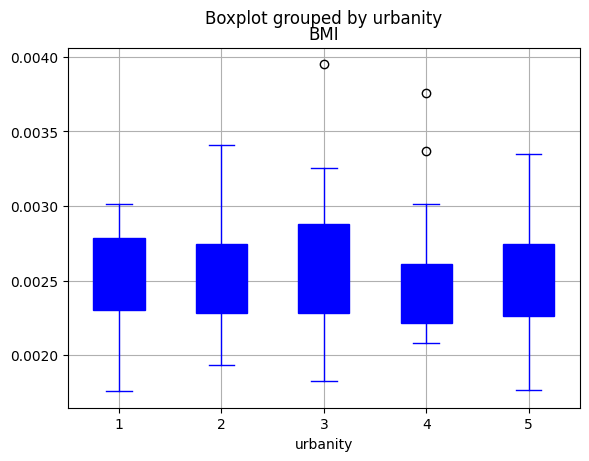

In [30]:
data.boxplot(column='BMI', by='urbanity', color='blue', patch_artist=True)

### d) Additional Bivariate Relationships

- Explore other pairs of variables as relevant (e.g., weight vs. height, fast food vs. gender).
- Use appropriate plots and statistics.

<Axes: title={'center': 'Scatterplot: Weight vs Height'}, xlabel='weight', ylabel='height'>

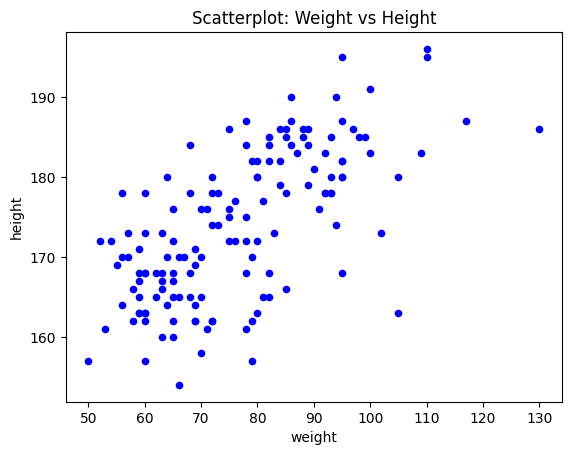

In [33]:
data.plot.scatter(x='weight', y='height', color='blue', title='Scatterplot: Weight vs Height')

<Axes: title={'center': 'fastfood'}, xlabel='gender'>

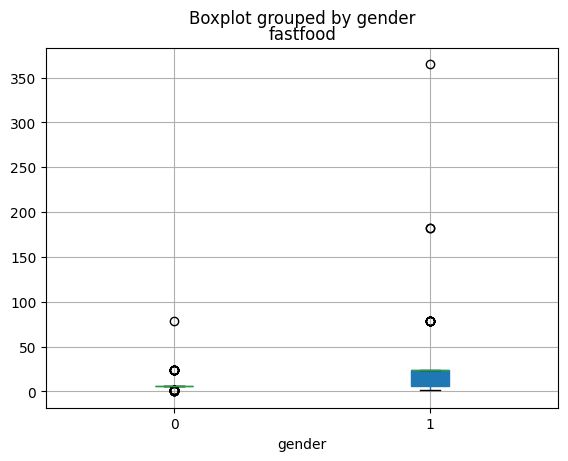

In [35]:
data.boxplot(column='fastfood', by='gender', patch_artist=True)

## 4. Summary

- Summarize the key findings from your missing value analysis, outlier handling, and bivariate EDA.
- Discuss how these steps improve the quality and reliability of your subsequent analyses.

In [15]:
## TODO
### Insert your Answer Here ###

Happy Coding .... ;) 